In [545]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df = pd.read_excel("feature_engineering.xlsx")
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,Single_Parent,Recency_Class,Age_Class,Total_Spent,Total_Spent_Class,Total_Purchases,Total_Purchases_Class,Total_Visits,Total_Visits_Class,Average_Purchase
0,1826,Graduation,Divorced,84835,0,0,0,189,104,379,...,False,Very Recent,Retiree,1190,Average-Spender,15,15-19,1,0-19,602.5
1,1,Graduation,Single,57091,0,0,0,464,5,64,...,False,Very Recent,Senior Citizen,577,Light-Spender,18,15-19,5,0-19,297.5
2,10476,Graduation,Married,67267,0,1,0,134,11,59,...,False,Very Recent,Senior Citizen,251,Cheap-Spender,11,10-14,2,0-19,131.0
3,1386,Graduation,Together,32474,1,1,0,10,0,1,...,False,Very Recent,Retiree,11,Cheap-Spender,4,0-4,7,0-19,7.5
4,5371,Graduation,Single,21474,1,0,0,6,16,24,...,True,Very Recent,Middle-Aged Working Class,91,Cheap-Spender,8,5-9,7,0-19,49.5


## Feature Engineering

In [546]:
features = df.drop(columns=['ID'])
features.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Single_Parent,Recency_Class,Age_Class,Total_Spent,Total_Spent_Class,Total_Purchases,Total_Purchases_Class,Total_Visits,Total_Visits_Class,Average_Purchase
0,Graduation,Divorced,84835,0,0,0,189,104,379,111,...,False,Very Recent,Retiree,1190,Average-Spender,15,15-19,1,0-19,602.5
1,Graduation,Single,57091,0,0,0,464,5,64,7,...,False,Very Recent,Senior Citizen,577,Light-Spender,18,15-19,5,0-19,297.5
2,Graduation,Married,67267,0,1,0,134,11,59,15,...,False,Very Recent,Senior Citizen,251,Cheap-Spender,11,10-14,2,0-19,131.0
3,Graduation,Together,32474,1,1,0,10,0,1,0,...,False,Very Recent,Retiree,11,Cheap-Spender,4,0-4,7,0-19,7.5
4,Graduation,Single,21474,1,0,0,6,16,24,11,...,True,Very Recent,Middle-Aged Working Class,91,Cheap-Spender,8,5-9,7,0-19,49.5


In [547]:
# Also encode Education and Marital_Status
features = pd.get_dummies(features, columns=['Education'], prefix='Education')
features = pd.get_dummies(features, columns=['Marital_Status'], prefix='Marital')
features = pd.get_dummies(features, columns=['Recency_Class'], prefix='Recency')
features = pd.get_dummies(features, columns=['Age_Class'], prefix='Age')
features = pd.get_dummies(features, columns=['Total_Spent_Class'], prefix='Total_Spent')
features = pd.get_dummies(features, columns=['Total_Purchases_Class'], prefix='Total_Purchases')
features = pd.get_dummies(features, columns=['Total_Visits_Class'], prefix='Total_Visits')
features = pd.get_dummies(features, columns=['Family_Classification'], prefix='Family_Classification')
features.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Total_Purchases_5-9,Total_Visits_0-19,Total_Visits_100-119+,Total_Visits_20-39,Total_Visits_40-59,Total_Visits_60-79,Total_Visits_80-99,Family_Classification_Childless,Family_Classification_Medium-Children,Family_Classification_Single-Child
0,84835,0,0,0,189,104,379,111,189,218,...,False,True,False,False,False,False,False,True,False,False
1,57091,0,0,0,464,5,64,7,0,37,...,False,True,False,False,False,False,False,True,False,False
2,67267,0,1,0,134,11,59,15,2,30,...,False,True,False,False,False,False,False,False,False,True
3,32474,1,1,0,10,0,1,0,0,0,...,False,True,False,False,False,False,False,False,True,False
4,21474,1,0,0,6,16,24,11,0,34,...,True,True,False,False,False,False,False,False,False,True


In [548]:
print(list(features.columns))


['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Response', 'Complain', 'Age', 'Customer_Enrollment', 'Household', 'Children', 'Single_Parent', 'Total_Spent', 'Total_Purchases', 'Total_Visits', 'Average_Purchase', 'Education_2n Cycle', 'Education_Basic', 'Education_Graduation', 'Education_Master', 'Education_PhD', 'Marital_Divorced', 'Marital_Married', 'Marital_Single', 'Marital_Together', 'Marital_Widow', 'Recency_Infrequent', 'Recency_Less Frequent', 'Recency_Moderate', 'Recency_Recent', 'Recency_Very Recent', 'Age_Middle-Aged Working Class', 'Age_Quinquagenarian', 'Age_Retiree', 'Age_Senior Citizen', 'Age_Very Old Senior Citizen', 'Total_Spent_Above-Average-Spender', 'Total_Spent_Average-Spender', 'Total_Spent_Cheap-Spender', 'Total_Spent_Heavy-Spender', 'Total_Spent_Light-Spender', 'T

In [549]:
features.reset_index(inplace=True)

## Logistic Regression

In [550]:
from sklearn.model_selection import train_test_split
X = features.drop(columns=['Response'], axis=1).iloc[:,1:][['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 
                                                            'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
                                                            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                                                            'NumStorePurchases', 'NumWebVisitsMonth', 
                                                            'Complain', 'Age', 'Customer_Enrollment', 'Household', 
                                                            'Children', 'Single_Parent', 'Total_Spent', 'Total_Purchases', 
                                                            'Total_Visits', 'Average_Purchase', 'Education_2n Cycle', 'Education_Basic', 
                                                            'Education_Graduation', 'Education_Master', 'Education_PhD', 
                                                            'Marital_Divorced', 'Marital_Married', 'Marital_Single', 'Marital_Together', 
                                                            'Marital_Widow', 'Recency_Infrequent', 'Recency_Less Frequent', 
                                                            'Recency_Moderate', 'Recency_Recent', 'Recency_Very Recent', 
                                                            'Age_Middle-Aged Working Class', 'Age_Quinquagenarian', 'Age_Retiree', 
                                                            'Age_Senior Citizen', 'Age_Very Old Senior Citizen', 
                                                            'Total_Spent_Above-Average-Spender', 'Total_Spent_Average-Spender', 
                                                            'Total_Spent_Cheap-Spender', 'Total_Spent_Heavy-Spender', 
                                                            'Total_Spent_Light-Spender', 'Total_Spent_Very-Heavy-Spender', 
                                                            'Total_Purchases_0-4', 'Total_Purchases_10-14', 'Total_Purchases_15-19', 
                                                            'Total_Purchases_20-24', 'Total_Purchases_25-29', 'Total_Purchases_30-34', 
                                                            'Total_Purchases_35-39+', 'Total_Purchases_5-9', 'Total_Visits_0-19', 
                                                            'Total_Visits_100-119+', 'Total_Visits_20-39', 'Total_Visits_40-59', 
                                                            'Total_Visits_60-79', 'Total_Visits_80-99', 'Family_Classification_Childless', 
                                                            'Family_Classification_Medium-Children', 'Family_Classification_Single-Child']
]
# X = features.drop(columns=['Response'], axis = 1)
y = features['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [551]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
# smote = SMOTE(random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)
# ros = RandomOverSampler(random_state=42)
# X_train, y_train = ros.fit_resample(X_train, y_train)

In [552]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [553]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

## Hyperparameter Optimization

In [554]:
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),  
    ('lg', LogisticRegression(random_state=42))
])
parameters = {
    'smote__sampling_strategy': ['not majority', 'all', 'auto', 'minority', 'not minority'],  # Adjust sampling strategy
    'smote__k_neighbors': [3, 5, 7, 9],  # Adjust number of neighbors for SMOTE
    'lg__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Regularization parameter for Logistic Regression
    'lg__solver': ['liblinear', 'lbfgs']  # Solver for Logistic Regression
}
grid_search = GridSearchCV(pipeline,  
                           param_grid = parameters,
                           scoring = 'precision',
                           cv = 5,
                           verbose=1)
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 280 candidates, totalling 1400 fits
[CV] END lg__C=0.001, lg__solver=liblinear, smote__k_neighbors=3, smote__sampling_strategy=not majority; total time=   0.4s
[CV] END lg__C=0.001, lg__solver=liblinear, smote__k_neighbors=3, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END lg__C=0.001, lg__solver=liblinear, smote__k_neighbors=3, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END lg__C=0.001, lg__solver=liblinear, smote__k_neighbors=3, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END lg__C=0.001, lg__solver=liblinear, smote__k_neighbors=3, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END lg__C=0.001, lg__solver=liblinear, smote__k_neighbors=3, smote__sampling_strategy=all; total time=   0.0s
[CV] END lg__C=0.001, lg__solver=liblinear, smote__k_neighbors=3, smote__sampling_strategy=all; total time=   0.0s
[CV] END lg__C=0.001, lg__solver=liblinear, smote__k_neighbors=3, smote__sampling_stra

c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

[CV] END lg__C=0.001, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=not minority; total time=   0.0s
[CV] END lg__C=0.001, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=not minority; total time=   0.0s
[CV] END lg__C=0.001, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=not minority; total time=   0.0s
[CV] END lg__C=0.001, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=not minority; total time=   0.0s
[CV] END lg__C=0.001, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END lg__C=0.001, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END lg__C=0.001, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END lg__C=0.001, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END lg__C=0.001, lg__solver=lbfgs, 

c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

[CV] END lg__C=0.001, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=not minority; total time=   0.0s
[CV] END lg__C=0.001, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=not minority; total time=   0.0s
[CV] END lg__C=0.001, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END lg__C=0.001, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END lg__C=0.001, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END lg__C=0.001, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END lg__C=0.001, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END lg__C=0.001, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=all; total time=   0.0s
[CV] END lg__C=0.001, lg__solver=lbfgs, smote__k_

c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

[CV] END lg__C=0.001, lg__solver=lbfgs, smote__k_neighbors=9, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END lg__C=0.001, lg__solver=lbfgs, smote__k_neighbors=9, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END lg__C=0.001, lg__solver=lbfgs, smote__k_neighbors=9, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END lg__C=0.001, lg__solver=lbfgs, smote__k_neighbors=9, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END lg__C=0.001, lg__solver=lbfgs, smote__k_neighbors=9, smote__sampling_strategy=all; total time=   0.0s
[CV] END lg__C=0.001, lg__solver=lbfgs, smote__k_neighbors=9, smote__sampling_strategy=all; total time=   0.0s
[CV] END lg__C=0.001, lg__solver=lbfgs, smote__k_neighbors=9, smote__sampling_strategy=all; total time=   0.0s
[CV] END lg__C=0.001, lg__solver=lbfgs, smote__k_neighbors=9, smote__sampling_strategy=all; total time=   0.0s
[CV] END lg__C=0.001, lg__solver=lbfgs, smote__k_neighbors=9, smote__samplin

c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

[CV] END lg__C=0.01, lg__solver=liblinear, smote__k_neighbors=3, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END lg__C=0.01, lg__solver=liblinear, smote__k_neighbors=3, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END lg__C=0.01, lg__solver=liblinear, smote__k_neighbors=3, smote__sampling_strategy=all; total time=   0.0s
[CV] END lg__C=0.01, lg__solver=liblinear, smote__k_neighbors=3, smote__sampling_strategy=all; total time=   0.0s
[CV] END lg__C=0.01, lg__solver=liblinear, smote__k_neighbors=3, smote__sampling_strategy=all; total time=   0.0s
[CV] END lg__C=0.01, lg__solver=liblinear, smote__k_neighbors=3, smote__sampling_strategy=all; total time=   0.0s
[CV] END lg__C=0.01, lg__solver=liblinear, smote__k_neighbors=3, smote__sampling_strategy=all; total time=   0.0s
[CV] END lg__C=0.01, lg__solver=liblinear, smote__k_neighbors=3, smote__sampling_strategy=auto; total time=   0.0s
[CV] END lg__C=0.01, lg__solver=liblinear, smote__k_neighbors=3, smot

c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=not majority; total time=   0.2s
[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=all; total time=   0.0s
[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=all; total time=   0.0s
[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=all; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=all; total time=   0.0s
[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=all; total time=   0.0s
[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=auto; total time=   0.0s
[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=auto; total time=   0.0s
[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=auto; total time=   0.0s
[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=auto; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=auto; total time=   0.0s
[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=minority; total time=   0.0s
[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=minority; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=minority; total time=   0.0s
[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=minority; total time=   0.0s
[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=minority; total time=   0.0s
[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=not minority; total time=   0.0s
[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=not minority; total time=   0.0s
[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=not minority; total time=   0.0s
[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=not minority; total time=   0.0s
[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=not minority; total time=   0.0s
[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_s

c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=all; total time=   0.0s
[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=all; total time=   0.0s
[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=all; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=all; total time=   0.0s
[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=auto; total time=   0.0s
[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=auto; total time=   0.0s
[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=auto; total time=   0.0s
[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=auto; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=auto; total time=   0.0s
[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=minority; total time=   0.0s
[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=minority; total time=   0.0s
[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=minority; total time=   0.0s
[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=minority; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=minority; total time=   0.0s
[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=not minority; total time=   0.0s
[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=not minority; total time=   0.0s
[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=not minority; total time=   0.0s
[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=not minority; total time=   0.0s
[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=not minority; total time=   0.0s
[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=7, smote__sa

c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=all; total time=   0.0s
[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=all; total time=   0.0s
[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=all; total time=   0.0s
[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=all; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=all; total time=   0.0s
[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=auto; total time=   0.0s
[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=auto; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=auto; total time=   0.0s
[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=auto; total time=   0.0s
[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=auto; total time=   0.0s
[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=minority; total time=   0.0s
[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=minority; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=minority; total time=   0.0s
[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=minority; total time=   0.0s
[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=minority; total time=   0.0s
[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=not minority; total time=   0.0s
[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=not minority; total time=   0.0s
[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=not minority; total time=   0.0s
[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=not minority; total time=   0.0s
[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=not minority; total time=   0.0s
[CV] END lg__C=10, lg__solver=lbfgs, smote__k_neighbors=9, smote__sampling_s

c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=all; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=all; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=all; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=all; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=all; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=auto; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=auto; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=auto; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=auto; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=auto; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=minority; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=minority; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=minority; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=minority; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=minority; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=not minority; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=not minority; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=not minority; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=not minority; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=not minority; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=5, smote__s

c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=all; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=all; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=all; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=all; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=all; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=auto; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=auto; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=auto; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=auto; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=auto; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=minority; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=minority; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=minority; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=minority; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=minority; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=not minority; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=not minority; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=not minority; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=not minority; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=not minority; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=not majority; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=not majority; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=all; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=all; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=all; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=all; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=all; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=auto; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=auto; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=auto; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=auto; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=auto; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=minority; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=minority; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=minority; total time=   0.1s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=minority; total time=   0.1s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=minority; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=not minority; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=not minority; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=not minority; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=not minority; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=not minority; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=9, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=9, smote__sampling_strategy=not majority; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=9, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=9, smote__sampling_strategy=not majority; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=9, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=9, smote__sampling_strategy=all; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=9, smote__sampling_strategy=all; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=9, smote__sampling_strategy=all; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=9, smote__sampling_strategy=all; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=9, smote__sampling_strategy=all; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=9, smote__sampling_strategy=auto; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=9, smote__sampling_strategy=auto; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=9, smote__sampling_strategy=auto; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=9, smote__sampling_strategy=auto; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=9, smote__sampling_strategy=auto; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=9, smote__sampling_strategy=minority; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=9, smote__sampling_strategy=minority; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=9, smote__sampling_strategy=minority; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=9, smote__sampling_strategy=minority; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=9, smote__sampling_strategy=minority; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=9, smote__sampling_strategy=not minority; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=9, smote__sampling_strategy=not minority; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=9, smote__sampling_strategy=not minority; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=9, smote__sampling_strategy=not minority; total time=   0.0s
[CV] END lg__C=100, lg__solver=lbfgs, smote__k_neighbors=9, smote__sampling_strategy=not minority; total time=   0.0s
[CV] END lg__C=1000, lg__solver=liblinear, smote__k_neighbors=3, smote__sampling_strategy=not majority; total time=   0.1s
[CV] END lg__C=1000, lg__solver=liblinear, smote__k_neighbo

c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=not majority; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=all; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=all; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=all; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=all; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=all; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=auto; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=auto; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=auto; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=auto; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=auto; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=minority; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=minority; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=minority; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=minority; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=minority; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=not minority; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=not minority; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=not minority; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=not minority; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=3, smote__sampling_strategy=not minority; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=not majority; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=all; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=all; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=all; total time=   0.2s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=all; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=all; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=auto; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=auto; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=auto; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=auto; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=auto; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=minority; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=minority; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=minority; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=minority; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=minority; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=not minority; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=not minority; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=not minority; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=not minority; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=5, smote__sampling_strategy=not minority; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=not majority; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=not majority; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=all; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=all; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=all; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=all; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=all; total time=   0.1s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=auto; total time=   0.2s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=auto; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=auto; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=auto; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=auto; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=minority; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=minority; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=minority; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=minority; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=minority; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=not minority; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=not minority; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=not minority; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=not minority; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=7, smote__sampling_strategy=not minority; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=9, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=9, smote__sampling_strategy=not majority; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=9, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=9, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=9, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=9, smote__sampling_strategy=all; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=9, smote__sampling_strategy=all; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=9, smote__sampling_strategy=all; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=9, smote__sampling_strategy=all; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=9, smote__sampling_strategy=all; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=9, smote__sampling_strategy=auto; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=9, smote__sampling_strategy=auto; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=9, smote__sampling_strategy=auto; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=9, smote__sampling_strategy=auto; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=9, smote__sampling_strategy=auto; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=9, smote__sampling_strategy=minority; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=9, smote__sampling_strategy=minority; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=9, smote__sampling_strategy=minority; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=9, smote__sampling_strategy=minority; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=9, smote__sampling_strategy=minority; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=9, smote__sampling_strategy=not minority; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=9, smote__sampling_strategy=not minority; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=9, smote__sampling_strategy=not minority; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=9, smote__sampling_strategy=not minority; total time=   0.0s
[CV] END lg__C=1000, lg__solver=lbfgs, smote__k_neighbors=9, smote__sampling_strategy=not minority; total time=   0.0s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('lg',
                                        LogisticRegression(random_state=42))]),
             param_grid={'lg__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'lg__solver': ['liblinear', 'lbfgs'],
                         'smote__k_neighbors': [3, 5, 7, 9],
                         'smote__sampling_strategy': ['not majority', 'all',
                                                      'auto', 'minority',
                                                      'not minority']},
             scoring='precision', verbose=2)

In [555]:
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Best parameters: {'lg__C': 0.01, 'lg__solver': 'lbfgs', 'smote__k_neighbors': 3, 'smote__sampling_strategy': 'not minority'}


In [556]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

# Define SMOTE with the best parameters
smote = SMOTE(sampling_strategy=best_params['smote__sampling_strategy'], 
              k_neighbors=best_params['smote__k_neighbors'], 
              random_state=42)

# Define Logistic Regression with the best parameters
lg = LogisticRegression(C=best_params['lg__C'], 
                        solver=best_params['lg__solver'], 
                        random_state=42)

# Create a pipeline with SMOTE and Logistic Regression
pipeline = Pipeline([('smote', smote), ('lg', lg)])

# Fit the pipeline to the scaled training data
pipeline.fit(X_train_scaled, y_train)

# Predictions on training and test set
lg_pred_train = pipeline.predict(X_train_scaled)
lg_pred_test = pipeline.predict(X_test_scaled)

# Calculate evaluation metrics
lg_acc = accuracy_score(y_test, lg_pred_test)
lg_prec = precision_score(y_test, lg_pred_test)
lg_rec = recall_score(y_test, lg_pred_test)
lg_f1 = f1_score(y_test, lg_pred_test)
lg_auc = roc_auc_score(y_test, lg_pred_test)

# Print evaluation metrics
print("Logistic Regression Accuracy: %.4f" % lg_acc)
print("Logistic Regression Precision: %.4f" % lg_prec)
print("Logistic Regression Recall: %.4f" % lg_rec)
print("Logistic Regression F1: %.4f" % lg_f1)
print("Logistic Regression AUC: %.4f" % lg_auc)

# Calculate precision scores for training and test set
lg_prec_train = precision_score(y_train, lg_pred_train)
lg_prec_test = precision_score(y_test, lg_pred_test)

# Check for overfitting
print('Training set precision: {:.4f}'.format(lg_prec_train))
print('Test set precision: {:.4f}'.format(lg_prec_test))


Logistic Regression Accuracy: 0.8804
Logistic Regression Precision: 0.7200
Logistic Regression Recall: 0.2250
Logistic Regression F1: 0.3429
Logistic Regression AUC: 0.6055
Training set precision: 0.7213
Test set precision: 0.7200


Confusion matrix

 [[490   7]
 [ 62  18]]

True Positives(TP) =  490

True Negatives(TN) =  18

False Positives(FP) =  7

False Negatives(FN) =  62


<Axes: >

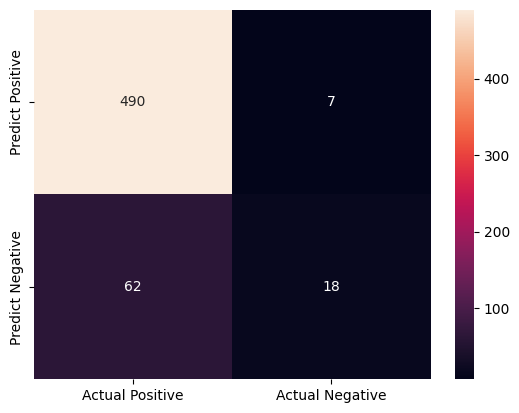

In [557]:
from sklearn.metrics import confusion_matrix
lg_cm = confusion_matrix(y_test, lg_pred_test)
print('Confusion matrix\n\n', lg_cm)
print('\nTrue Positives(TP) = ', lg_cm[0,0])
print('\nTrue Negatives(TN) = ', lg_cm[1,1])
print('\nFalse Positives(FP) = ', lg_cm[0,1])
print('\nFalse Negatives(FN) = ', lg_cm[1,0])
cm_matrix = pd.DataFrame(data=lg_cm, columns=['Actual Positive', 'Actual Negative'], 
                                 index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d')

## Naive Bayes

In [558]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [559]:
nb_pred_train = nb.predict(X_train)
nb_pred_test = nb.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred_test)
nb_prec = precision_score(y_test, nb_pred_test)
nb_rec = recall_score(y_test, nb_pred_test)
nb_f1 = f1_score(y_test, nb_pred_test)
nb_auc = roc_auc_score(y_test, nb_pred_test)
print("Naive Bayes Accuracy: %.4f" % nb_acc)
print("Naive Bayes Precision: %.4f" % nb_prec)
print("Naive Bayes Recall: %.4f" % nb_rec)
print("Naive Bayes F1: %.4f" % nb_f1)
print("Naive Bayes AUC: %.4f" % nb_auc)

nb_prec_train = precision_score(y_train, nb_pred_train)
nb_prec_test = precision_score(y_test, nb_pred_test)
# Check for overfitting
print('Training set score: {:.4f}'.format(nb_prec_train))
print('Test set score: {:.4f}'.format(nb_prec_test))

Naive Bayes Accuracy: 0.7522
Naive Bayes Precision: 0.2797
Naive Bayes Recall: 0.5000
Naive Bayes F1: 0.3587
Naive Bayes AUC: 0.6464
Training set score: 0.3087
Test set score: 0.2797


Confusion matrix

 [[394 103]
 [ 40  40]]

True Positives(TP) =  394

True Negatives(TN) =  40

False Positives(FP) =  103

False Negatives(FN) =  40


<Axes: >

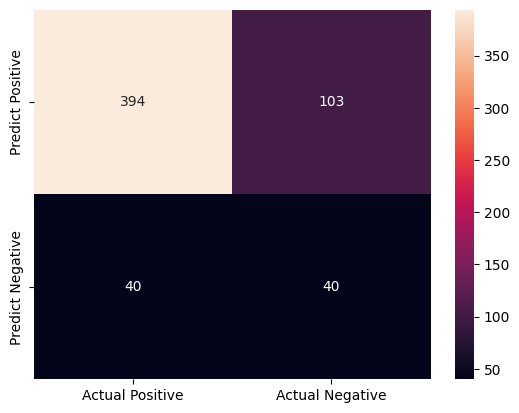

In [560]:
nb_cm = confusion_matrix(y_test, nb_pred_test)
print('Confusion matrix\n\n', nb_cm)
print('\nTrue Positives(TP) = ', nb_cm[0,0])
print('\nTrue Negatives(TN) = ', nb_cm[1,1])
print('\nFalse Positives(FP) = ', nb_cm[0,1])
print('\nFalse Negatives(FN) = ', nb_cm[1,0])
cm_matrix = pd.DataFrame(data=nb_cm, columns=['Actual Positive', 'Actual Negative'], 
                                 index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d')

## Decision Trees

In [561]:
from sklearn.tree import DecisionTreeClassifier

## HyperParameter Optimization

In [562]:
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),  
    ('dt', DecisionTreeClassifier(random_state=42))
])
parameters = {
    'smote__sampling_strategy': ['not majority', 'all', 'auto', 'minority', 'not minority'],  
    'smote__k_neighbors': [3, 5, 7, 9],  
    'dt__max_depth': [None, 10, 20],  
    'dt__min_samples_split': [2, 5],  
    'dt__min_samples_leaf': [1, 2]  
}

grid_search = GridSearchCV(pipeline,  
                           param_grid=parameters,
                           scoring='precision',
                           cv=5,
                           verbose=1)

grid_search.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 1080 candidates, totalling 5400 fits
[CV] END dt__max_depth=None, dt__min_samples_leaf=1, dt__min_samples_split=2, smote__k_neighbors=3, smote__sampling_strategy=not majority; total time=   0.2s
[CV] END dt__max_depth=None, dt__min_samples_leaf=1, dt__min_samples_split=2, smote__k_neighbors=3, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END dt__max_depth=None, dt__min_samples_leaf=1, dt__min_samples_split=2, smote__k_neighbors=3, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END dt__max_depth=None, dt__min_samples_leaf=1, dt__min_samples_split=2, smote__k_neighbors=3, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END dt__max_depth=None, dt__min_samples_leaf=1, dt__min_samples_split=2, smote__k_neighbors=3, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END dt__max_depth=None, dt__min_samples_leaf=1, dt__min_samples_split=2, smote__k_neighbors=3, smote__sampling_strategy=all; total time=   0

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('dt',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'dt__max_depth': [None, 10, 20, 30, 40, 50],
                         'dt__min_samples_leaf': [1, 2, 4],
                         'dt__min_samples_split': [2, 5, 10],
                         'smote__k_neighbors': [3, 5, 7, 9],
                         'smote__sampling_strategy': ['not majority', 'all',
                                                      'auto', 'minority',
                                                      'not minority']},
             scoring='precision', verbose=2)

In [563]:
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Best parameters: {'dt__max_depth': 10, 'dt__min_samples_leaf': 2, 'dt__min_samples_split': 5, 'smote__k_neighbors': 3, 'smote__sampling_strategy': 'not minority'}


In [564]:
best_params = grid_search.best_params_

smote = SMOTE(sampling_strategy=best_params['smote__sampling_strategy'], 
              k_neighbors=best_params['smote__k_neighbors'], 
              random_state=42)

dt = DecisionTreeClassifier(max_depth=best_params['dt__max_depth'], 
                            min_samples_split=best_params['dt__min_samples_split'], 
                            min_samples_leaf=best_params['dt__min_samples_leaf'],
                            random_state = 42)  

pipeline = Pipeline([('smote', smote), ('dt', dt)])

pipeline.fit(X_train_scaled, y_train)

dt_pred_train = pipeline.predict(X_train_scaled)
dt_pred_test = pipeline.predict(X_test_scaled)

dt_acc = accuracy_score(y_test, dt_pred_test)
dt_prec = precision_score(y_test, dt_pred_test)
dt_rec = recall_score(y_test, dt_pred_test)
dt_f1 = f1_score(y_test, dt_pred_test)
dt_auc = roc_auc_score(y_test, dt_pred_test)

print("Decision Tree Accuracy: %.4f" % dt_acc)
print("Decision Tree Precision: %.4f" % dt_prec)
print("Decision Tree Recall: %.4f" % dt_rec)
print("Decision Tree F1: %.4f" % dt_f1)
print("Decision Tree AUC: %.4f" % dt_auc)

dt_prec_train = precision_score(y_train, dt_pred_train)
dt_prec_test = precision_score(y_test, dt_pred_test)

print('Training set precision: {:.4f}'.format(dt_prec_train))
print('Test set precision: {:.4f}'.format(dt_prec_test))

Decision Tree Accuracy: 0.8475
Decision Tree Precision: 0.4412
Decision Tree Recall: 0.3750
Decision Tree F1: 0.4054
Decision Tree AUC: 0.6493
Training set precision: 0.9212
Test set precision: 0.4412


Confusion matrix

 [[459  38]
 [ 50  30]]

True Positives(TP) =  459

True Negatives(TN) =  30

False Positives(FP) =  38

False Negatives(FN) =  50


<Axes: >

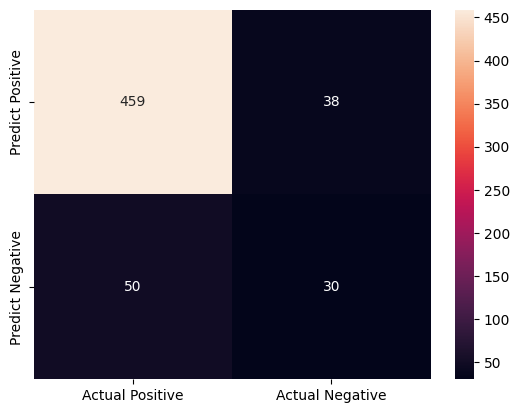

In [565]:
dt_cm = confusion_matrix(y_test, dt_pred_test)
print('Confusion matrix\n\n', dt_cm)
print('\nTrue Positives(TP) = ', dt_cm[0,0])
print('\nTrue Negatives(TN) = ', dt_cm[1,1])
print('\nFalse Positives(FP) = ', dt_cm[0,1])
print('\nFalse Negatives(FN) = ', dt_cm[1,0])
cm_matrix = pd.DataFrame(data=dt_cm, columns=['Actual Positive', 'Actual Negative'], 
                                 index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d')

## K-Nearest Neighbors

In [566]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

## HyperParameter Optimization

In [567]:
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),  
    ('knn', KNeighborsClassifier())
])
parameters = {
    'smote__sampling_strategy': ['not majority', 'all', 'auto', 'minority', 'not minority'],  # Adjust sampling strategy
    'smote__k_neighbors': [3, 5, 7, 9],  # Adjust number of neighbors for SMOTE
    'knn__n_neighbors': [3, 5, 7, 9],  # Number of neighbors for kNN
    'knn__weights': ['uniform', 'distance'],  # Weight function used in prediction
    'knn__p': [1, 2]  # Power parameter for Minkowski metric
}

grid_search = GridSearchCV(pipeline,  
                           param_grid=parameters,
                           scoring='precision',
                           cv=5,
                           verbose=1)
grid_search.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 320 candidates, totalling 1600 fits
[CV] END knn__n_neighbors=3, knn__p=1, knn__weights=uniform, smote__k_neighbors=3, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END knn__n_neighbors=3, knn__p=1, knn__weights=uniform, smote__k_neighbors=3, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END knn__n_neighbors=3, knn__p=1, knn__weights=uniform, smote__k_neighbors=3, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END knn__n_neighbors=3, knn__p=1, knn__weights=uniform, smote__k_neighbors=3, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END knn__n_neighbors=3, knn__p=1, knn__weights=uniform, smote__k_neighbors=3, smote__sampling_strategy=not majority; total time=   0.0s
[CV] END knn__n_neighbors=3, knn__p=1, knn__weights=uniform, smote__k_neighbors=3, smote__sampling_strategy=all; total time=   0.0s
[CV] END knn__n_neighbors=3, knn__p=1, knn__weights=uniform, smote__k_neighbors=3, smote__sampling_

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [3, 5, 7, 9], 'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance'],
                         'smote__k_neighbors': [3, 5, 7, 9],
                         'smote__sampling_strategy': ['not majority', 'all',
                                                      'auto', 'minority',
                                                      'not minority']},
             scoring='precision', verbose=2)

In [568]:
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Best parameters: {'knn__n_neighbors': 7, 'knn__p': 1, 'knn__weights': 'uniform', 'smote__k_neighbors': 3, 'smote__sampling_strategy': 'not minority'}


In [571]:
best_params = grid_search.best_params_

smote = SMOTE(sampling_strategy=best_params['smote__sampling_strategy'], 
              k_neighbors=best_params['smote__k_neighbors'], 
              random_state=42)

knn = KNeighborsClassifier(n_neighbors=best_params['knn__n_neighbors'], weights=best_params['knn__weights'],
                           p=best_params['knn__p'])

pipeline = Pipeline([('smote', smote), ('knn', knn)])

pipeline.fit(X_train_scaled, y_train)

knn_pred_train = pipeline.predict(X_train_scaled)
knn_pred_test = pipeline.predict(X_test_scaled)

knn_acc = accuracy_score(y_test, knn_pred_test)
knn_prec = precision_score(y_test, knn_pred_test)
knn_rec = recall_score(y_test, knn_pred_test)
knn_f1 = f1_score(y_test, knn_pred_test)
knn_auc = roc_auc_score(y_test, knn_pred_test)

print("k-Nearest Neighbors Accuracy: %.4f" % knn_acc)
print("k-Nearest Neighbors Precision: %.4f" % knn_prec)
print("k-Nearest Neighbors Recall: %.4f" % knn_rec)
print("k-Nearest Neighbors F1: %.4f" % knn_f1)
print("k-Nearest Neighbors AUC: %.4f" % knn_auc)

knn_prec_train = precision_score(y_train, knn_pred_train)
knn_prec_test = precision_score(y_test, knn_pred_test)

print('Training set precision: {:.4f}'.format(knn_prec_train))
print('Test set precision: {:.4f}'.format(knn_prec_test))

k-Nearest Neighbors Accuracy: 0.8666
k-Nearest Neighbors Precision: 0.5455
k-Nearest Neighbors Recall: 0.2250
k-Nearest Neighbors F1: 0.3186
k-Nearest Neighbors AUC: 0.5974
Training set precision: 0.7381
Test set precision: 0.5455


Confusion matrix

 [[482  15]
 [ 62  18]]

True Positives(TP) =  482

True Negatives(TN) =  18

False Positives(FP) =  15

False Negatives(FN) =  62


<Axes: >

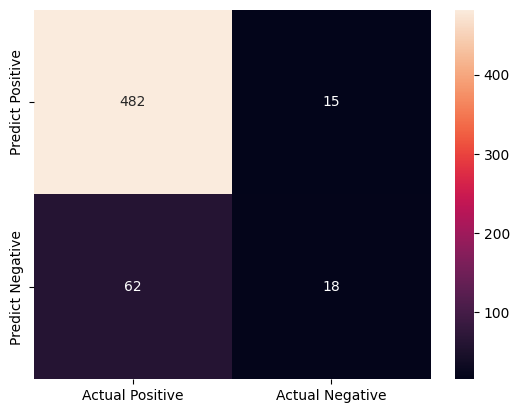

In [572]:
knn_cm = confusion_matrix(y_test, knn_pred_test)
print('Confusion matrix\n\n', knn_cm)
print('\nTrue Positives(TP) = ', knn_cm[0,0])
print('\nTrue Negatives(TN) = ', knn_cm[1,1])
print('\nFalse Positives(FP) = ', knn_cm[0,1])
print('\nFalse Negatives(FN) = ', knn_cm[1,0])
cm_matrix = pd.DataFrame(data=knn_cm, columns=['Actual Positive', 'Actual Negative'], 
                                 index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d')

## Support Vector Machines

In [573]:
from sklearn.svm import SVC

## Hyperparameter Optimization

In [574]:
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),  
    ('svm', SVC(random_state=42))
])

parameters = {
    'smote__sampling_strategy': ['not majority', 'all', 'auto', 'minority', 'not minority'],  # Adjust sampling strategy
    'smote__k_neighbors': [3, 5, 7, 9],  # Adjust number of neighbors for SMOTE
    'svm__C': [0.1, 1],  # Reduced range for regularization parameter
    'svm__kernel': ['linear', 'rbf'],  # Reduced kernel types
    'svm__gamma': ['scale']  # Removed 'auto' as it's the default value
}

grid_search = GridSearchCV(pipeline,  
                           param_grid=parameters,
                           scoring='precision',
                           cv=5,
                           verbose=1)

grid_search.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 480 candidates, totalling 2400 fits
[CV] END smote__k_neighbors=3, smote__sampling_strategy=not majority, svm__C=0.1, svm__gamma=scale, svm__kernel=linear; total time=   0.2s
[CV] END smote__k_neighbors=3, smote__sampling_strategy=not majority, svm__C=0.1, svm__gamma=scale, svm__kernel=linear; total time=   0.0s
[CV] END smote__k_neighbors=3, smote__sampling_strategy=not majority, svm__C=0.1, svm__gamma=scale, svm__kernel=linear; total time=   0.0s
[CV] END smote__k_neighbors=3, smote__sampling_strategy=not majority, svm__C=0.1, svm__gamma=scale, svm__kernel=linear; total time=   0.0s
[CV] END smote__k_neighbors=3, smote__sampling_strategy=not majority, svm__C=0.1, svm__gamma=scale, svm__kernel=linear; total time=   0.1s
[CV] END smote__k_neighbors=3, smote__sampling_strategy=not majority, svm__C=0.1, svm__gamma=scale, svm__kernel=rbf; total time=   0.1s
[CV] END smote__k_neighbors=3, smote__sampling_strategy=not majority, svm__C=0.1, svm__gamma=scale, svm__

c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

[CV] END smote__k_neighbors=3, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=scale, svm__kernel=rbf; total time=   0.0s
[CV] END smote__k_neighbors=3, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=scale, svm__kernel=rbf; total time=   0.0s
[CV] END smote__k_neighbors=3, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=scale, svm__kernel=rbf; total time=   0.0s
[CV] END smote__k_neighbors=3, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=scale, svm__kernel=rbf; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END smote__k_neighbors=3, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=scale, svm__kernel=poly; total time=   0.0s
[CV] END smote__k_neighbors=3, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=scale, svm__kernel=poly; total time=   0.0s
[CV] END smote__k_neighbors=3, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=scale, svm__kernel=poly; total time=   0.0s
[CV] END smote__k_neighbors=3, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=scale, svm__kernel=poly; total time=   0.0s
[CV] END smote__k_neighbors=3, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=scale, svm__kernel=poly; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

[CV] END smote__k_neighbors=3, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=scale, svm__kernel=sigmoid; total time=   0.0s
[CV] END smote__k_neighbors=3, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=scale, svm__kernel=sigmoid; total time=   0.0s
[CV] END smote__k_neighbors=3, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=scale, svm__kernel=sigmoid; total time=   0.0s
[CV] END smote__k_neighbors=3, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=scale, svm__kernel=sigmoid; total time=   0.0s
[CV] END smote__k_neighbors=3, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=scale, svm__kernel=sigmoid; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END smote__k_neighbors=3, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=linear; total time=   0.0s
[CV] END smote__k_neighbors=3, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=linear; total time=   0.0s
[CV] END smote__k_neighbors=3, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=linear; total time=   0.0s
[CV] END smote__k_neighbors=3, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=linear; total time=   0.0s
[CV] END smote__k_neighbors=3, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=linear; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

[CV] END smote__k_neighbors=3, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=rbf; total time=   0.0s
[CV] END smote__k_neighbors=3, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=rbf; total time=   0.0s
[CV] END smote__k_neighbors=3, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=rbf; total time=   0.0s
[CV] END smote__k_neighbors=3, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=rbf; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END smote__k_neighbors=3, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=rbf; total time=   0.0s
[CV] END smote__k_neighbors=3, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=poly; total time=   0.0s
[CV] END smote__k_neighbors=3, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=poly; total time=   0.0s
[CV] END smote__k_neighbors=3, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=poly; total time=   0.0s
[CV] END smote__k_neighbors=3, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=poly; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

[CV] END smote__k_neighbors=3, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=poly; total time=   0.0s
[CV] END smote__k_neighbors=3, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=sigmoid; total time=   0.0s
[CV] END smote__k_neighbors=3, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=sigmoid; total time=   0.0s
[CV] END smote__k_neighbors=3, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=sigmoid; total time=   0.0s
[CV] END smote__k_neighbors=3, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=sigmoid; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END smote__k_neighbors=3, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=sigmoid; total time=   0.0s
[CV] END smote__k_neighbors=3, smote__sampling_strategy=not minority, svm__C=1, svm__gamma=scale, svm__kernel=linear; total time=   0.0s
[CV] END smote__k_neighbors=3, smote__sampling_strategy=not minority, svm__C=1, svm__gamma=scale, svm__kernel=linear; total time=   0.1s
[CV] END smote__k_neighbors=3, smote__sampling_strategy=not minority, svm__C=1, svm__gamma=scale, svm__kernel=linear; total time=   0.0s
[CV] END smote__k_neighbors=3, smote__sampling_strategy=not minority, svm__C=1, svm__gamma=scale, svm__kernel=linear; total time=   0.0s
[CV] END smote__k_neighbors=3, smote__sampling_strategy=not minority, svm__C=1, svm__gamma=scale, svm__kernel=linear; total time=   0.1s
[CV] END smote__k_neighbors=3, smote__sampling_strategy=not minority, svm__C=1, svm__gamma=scale, svm__kernel=rbf; total time=   0.0s
[CV] END smote__k_neighbors=3, smote__samp

c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

[CV] END smote__k_neighbors=5, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=scale, svm__kernel=rbf; total time=   0.0s
[CV] END smote__k_neighbors=5, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=scale, svm__kernel=rbf; total time=   0.0s
[CV] END smote__k_neighbors=5, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=scale, svm__kernel=rbf; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END smote__k_neighbors=5, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=scale, svm__kernel=rbf; total time=   0.0s
[CV] END smote__k_neighbors=5, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=scale, svm__kernel=poly; total time=   0.0s
[CV] END smote__k_neighbors=5, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=scale, svm__kernel=poly; total time=   0.0s
[CV] END smote__k_neighbors=5, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=scale, svm__kernel=poly; total time=   0.0s
[CV] END smote__k_neighbors=5, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=scale, svm__kernel=poly; total time=   0.0s
[CV] END smote__k_neighbors=5, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=scale, svm__kernel=poly; total time=   0.0s
[CV] END smote__k_neighbors=5, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=scale, svm__kernel=sigmoid; total time=   0.0s
[CV] END smote__k_neighbors=5, smote__s

c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

[CV] END smote__k_neighbors=5, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=scale, svm__kernel=sigmoid; total time=   0.0s
[CV] END smote__k_neighbors=5, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=scale, svm__kernel=sigmoid; total time=   0.0s
[CV] END smote__k_neighbors=5, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=scale, svm__kernel=sigmoid; total time=   0.0s
[CV] END smote__k_neighbors=5, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=linear; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END smote__k_neighbors=5, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=linear; total time=   0.0s
[CV] END smote__k_neighbors=5, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=linear; total time=   0.0s
[CV] END smote__k_neighbors=5, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=linear; total time=   0.0s
[CV] END smote__k_neighbors=5, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=linear; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

[CV] END smote__k_neighbors=5, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=rbf; total time=   0.0s
[CV] END smote__k_neighbors=5, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=rbf; total time=   0.0s
[CV] END smote__k_neighbors=5, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=rbf; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END smote__k_neighbors=5, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=rbf; total time=   0.0s
[CV] END smote__k_neighbors=5, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=rbf; total time=   0.0s
[CV] END smote__k_neighbors=5, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=poly; total time=   0.0s
[CV] END smote__k_neighbors=5, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=poly; total time=   0.0s
[CV] END smote__k_neighbors=5, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=poly; total time=   0.0s
[CV] END smote__k_neighbors=5, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=poly; total time=   0.0s
[CV] END smote__k_neighbors=5, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=poly; total time=   0.0s
[CV] END smote__k_neighbors=5, smote__sampling_str

c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

[CV] END smote__k_neighbors=5, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=sigmoid; total time=   0.0s
[CV] END smote__k_neighbors=5, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=sigmoid; total time=   0.0s
[CV] END smote__k_neighbors=5, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=sigmoid; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END smote__k_neighbors=5, smote__sampling_strategy=not minority, svm__C=1, svm__gamma=scale, svm__kernel=linear; total time=   0.1s
[CV] END smote__k_neighbors=5, smote__sampling_strategy=not minority, svm__C=1, svm__gamma=scale, svm__kernel=linear; total time=   0.1s
[CV] END smote__k_neighbors=5, smote__sampling_strategy=not minority, svm__C=1, svm__gamma=scale, svm__kernel=linear; total time=   0.0s
[CV] END smote__k_neighbors=5, smote__sampling_strategy=not minority, svm__C=1, svm__gamma=scale, svm__kernel=linear; total time=   0.1s
[CV] END smote__k_neighbors=5, smote__sampling_strategy=not minority, svm__C=1, svm__gamma=scale, svm__kernel=linear; total time=   0.1s
[CV] END smote__k_neighbors=5, smote__sampling_strategy=not minority, svm__C=1, svm__gamma=scale, svm__kernel=rbf; total time=   0.0s
[CV] END smote__k_neighbors=5, smote__sampling_strategy=not minority, svm__C=1, svm__gamma=scale, svm__kernel=rbf; total time=   0.0s
[CV] END smote__k_neighbors=5, smote__sampling_

c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

[CV] END smote__k_neighbors=7, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=scale, svm__kernel=rbf; total time=   0.0s
[CV] END smote__k_neighbors=7, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=scale, svm__kernel=rbf; total time=   0.0s
[CV] END smote__k_neighbors=7, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=scale, svm__kernel=rbf; total time=   0.0s
[CV] END smote__k_neighbors=7, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=scale, svm__kernel=rbf; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END smote__k_neighbors=7, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=scale, svm__kernel=rbf; total time=   0.1s
[CV] END smote__k_neighbors=7, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=scale, svm__kernel=poly; total time=   0.0s
[CV] END smote__k_neighbors=7, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=scale, svm__kernel=poly; total time=   0.0s
[CV] END smote__k_neighbors=7, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=scale, svm__kernel=poly; total time=   0.0s
[CV] END smote__k_neighbors=7, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=scale, svm__kernel=poly; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

[CV] END smote__k_neighbors=7, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=scale, svm__kernel=poly; total time=   0.0s
[CV] END smote__k_neighbors=7, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=scale, svm__kernel=sigmoid; total time=   0.0s
[CV] END smote__k_neighbors=7, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=scale, svm__kernel=sigmoid; total time=   0.0s
[CV] END smote__k_neighbors=7, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=scale, svm__kernel=sigmoid; total time=   0.0s
[CV] END smote__k_neighbors=7, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=scale, svm__kernel=sigmoid; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END smote__k_neighbors=7, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=scale, svm__kernel=sigmoid; total time=   0.0s
[CV] END smote__k_neighbors=7, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=linear; total time=   0.0s
[CV] END smote__k_neighbors=7, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=linear; total time=   0.0s
[CV] END smote__k_neighbors=7, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=linear; total time=   0.0s
[CV] END smote__k_neighbors=7, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=linear; total time=   0.0s
[CV] END smote__k_neighbors=7, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=linear; total time=   0.0s
[CV] END smote__k_neighbors=7, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=rbf; total time=   0.0s
[CV] END smote__k_neighbors=7, smot

c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

[CV] END smote__k_neighbors=7, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=rbf; total time=   0.0s
[CV] END smote__k_neighbors=7, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=rbf; total time=   0.0s
[CV] END smote__k_neighbors=7, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=rbf; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END smote__k_neighbors=7, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=poly; total time=   0.0s
[CV] END smote__k_neighbors=7, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=poly; total time=   0.0s
[CV] END smote__k_neighbors=7, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=poly; total time=   0.0s
[CV] END smote__k_neighbors=7, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=poly; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

[CV] END smote__k_neighbors=7, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=poly; total time=   0.0s
[CV] END smote__k_neighbors=7, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=sigmoid; total time=   0.0s
[CV] END smote__k_neighbors=7, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=sigmoid; total time=   0.0s
[CV] END smote__k_neighbors=7, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=sigmoid; total time=   0.0s
[CV] END smote__k_neighbors=7, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=sigmoid; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END smote__k_neighbors=7, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=sigmoid; total time=   0.0s
[CV] END smote__k_neighbors=7, smote__sampling_strategy=not minority, svm__C=1, svm__gamma=scale, svm__kernel=linear; total time=   0.1s
[CV] END smote__k_neighbors=7, smote__sampling_strategy=not minority, svm__C=1, svm__gamma=scale, svm__kernel=linear; total time=   0.1s
[CV] END smote__k_neighbors=7, smote__sampling_strategy=not minority, svm__C=1, svm__gamma=scale, svm__kernel=linear; total time=   0.0s
[CV] END smote__k_neighbors=7, smote__sampling_strategy=not minority, svm__C=1, svm__gamma=scale, svm__kernel=linear; total time=   0.1s
[CV] END smote__k_neighbors=7, smote__sampling_strategy=not minority, svm__C=1, svm__gamma=scale, svm__kernel=linear; total time=   0.1s
[CV] END smote__k_neighbors=7, smote__sampling_strategy=not minority, svm__C=1, svm__gamma=scale, svm__kernel=rbf; total time=   0.0s
[CV] END smote__k_neighbors=7, smote__samp

c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

[CV] END smote__k_neighbors=9, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=scale, svm__kernel=rbf; total time=   0.0s
[CV] END smote__k_neighbors=9, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=scale, svm__kernel=rbf; total time=   0.0s
[CV] END smote__k_neighbors=9, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=scale, svm__kernel=rbf; total time=   0.0s
[CV] END smote__k_neighbors=9, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=scale, svm__kernel=poly; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END smote__k_neighbors=9, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=scale, svm__kernel=poly; total time=   0.0s
[CV] END smote__k_neighbors=9, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=scale, svm__kernel=poly; total time=   0.0s
[CV] END smote__k_neighbors=9, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=scale, svm__kernel=poly; total time=   0.0s
[CV] END smote__k_neighbors=9, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=scale, svm__kernel=poly; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

[CV] END smote__k_neighbors=9, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=scale, svm__kernel=sigmoid; total time=   0.0s
[CV] END smote__k_neighbors=9, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=scale, svm__kernel=sigmoid; total time=   0.0s
[CV] END smote__k_neighbors=9, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=scale, svm__kernel=sigmoid; total time=   0.0s
[CV] END smote__k_neighbors=9, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=scale, svm__kernel=sigmoid; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END smote__k_neighbors=9, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=scale, svm__kernel=sigmoid; total time=   0.0s
[CV] END smote__k_neighbors=9, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=linear; total time=   0.0s
[CV] END smote__k_neighbors=9, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=linear; total time=   0.0s
[CV] END smote__k_neighbors=9, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=linear; total time=   0.0s
[CV] END smote__k_neighbors=9, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=linear; total time=   0.0s
[CV] END smote__k_neighbors=9, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=linear; total time=   0.1s
[CV] END smote__k_neighbors=9, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=rbf; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

[CV] END smote__k_neighbors=9, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=rbf; total time=   0.0s
[CV] END smote__k_neighbors=9, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=rbf; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END smote__k_neighbors=9, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=rbf; total time=   0.0s
[CV] END smote__k_neighbors=9, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=rbf; total time=   0.0s
[CV] END smote__k_neighbors=9, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=poly; total time=   0.0s
[CV] END smote__k_neighbors=9, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=poly; total time=   0.0s
[CV] END smote__k_neighbors=9, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=poly; total time=   0.0s
[CV] END smote__k_neighbors=9, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=poly; total time=   0.0s
[CV] END smote__k_neighbors=9, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=poly; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

[CV] END smote__k_neighbors=9, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=sigmoid; total time=   0.0s
[CV] END smote__k_neighbors=9, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=sigmoid; total time=   0.0s
[CV] END smote__k_neighbors=9, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=sigmoid; total time=   0.0s
[CV] END smote__k_neighbors=9, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=sigmoid; total time=   0.0s


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END smote__k_neighbors=9, smote__sampling_strategy=not minority, svm__C=0.1, svm__gamma=auto, svm__kernel=sigmoid; total time=   0.0s
[CV] END smote__k_neighbors=9, smote__sampling_strategy=not minority, svm__C=1, svm__gamma=scale, svm__kernel=linear; total time=   0.1s
[CV] END smote__k_neighbors=9, smote__sampling_strategy=not minority, svm__C=1, svm__gamma=scale, svm__kernel=linear; total time=   0.1s
[CV] END smote__k_neighbors=9, smote__sampling_strategy=not minority, svm__C=1, svm__gamma=scale, svm__kernel=linear; total time=   0.0s
[CV] END smote__k_neighbors=9, smote__sampling_strategy=not minority, svm__C=1, svm__gamma=scale, svm__kernel=linear; total time=   0.1s
[CV] END smote__k_neighbors=9, smote__sampling_strategy=not minority, svm__C=1, svm__gamma=scale, svm__kernel=linear; total time=   0.1s
[CV] END smote__k_neighbors=9, smote__sampling_strategy=not minority, svm__C=1, svm__gamma=scale, svm__kernel=rbf; total time=   0.0s
[CV] END smote__k_neighbors=9, smote__samp

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('svm', SVC(random_state=42))]),
             param_grid={'smote__k_neighbors': [3, 5, 7, 9],
                         'smote__sampling_strategy': ['not majority', 'all',
                                                      'auto', 'minority',
                                                      'not minority'],
                         'svm__C': [0.1, 1, 10],
                         'svm__gamma': ['scale', 'auto'],
                         'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='precision', verbose=2)

In [575]:
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Best parameters: {'smote__k_neighbors': 3, 'smote__sampling_strategy': 'not minority', 'svm__C': 0.1, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}


In [576]:
smote = SMOTE(sampling_strategy=best_params['smote__sampling_strategy'], 
              k_neighbors=best_params['smote__k_neighbors'], 
              random_state=42)

svm = SVC(C=best_params['svm__C'], kernel = best_params['svm__kernel'],
          gamma=best_params['svm__gamma'], random_state = 42)

pipeline = Pipeline([('smote', smote), ('svm', svm)])

pipeline.fit(X_train_scaled, y_train)

svm_pred_train = pipeline.predict(X_train_scaled)
svm_pred_test = pipeline.predict(X_test_scaled)

svm_acc = accuracy_score(y_test, svm_pred_test)
svm_prec = precision_score(y_test, svm_pred_test)
svm_rec = recall_score(y_test, svm_pred_test)
svm_f1 = f1_score(y_test, svm_pred_test)
svm_auc = roc_auc_score(y_test, svm_pred_test)

print("Support Vector Machines Accuracy: %.4f" % svm_acc)
print("Support Vector Machines Precision: %.4f" % svm_prec)
print("Support Vector Machines Recall: %.4f" % svm_rec)
print("Support Vector Machines F1: %.4f" % svm_f1)
print("Support Vector Machines AUC: %.4f" % svm_auc)

svm_prec_train = precision_score(y_train, svm_pred_train)
svm_prec_test = precision_score(y_test, svm_pred_test)

print('Training set precision: {:.4f}'.format(svm_prec_train))
print('Test set precision: {:.4f}'.format(svm_prec_test))

Support Vector Machines Accuracy: 0.8891
Support Vector Machines Precision: 0.7222
Support Vector Machines Recall: 0.3250
Support Vector Machines F1: 0.4483
Support Vector Machines AUC: 0.6524
Training set precision: 0.8125
Test set precision: 0.7222


Confusion matrix

 [[487  10]
 [ 54  26]]

True Positives(TP) =  487

True Negatives(TN) =  26

False Positives(FP) =  10

False Negatives(FN) =  54


<Axes: >

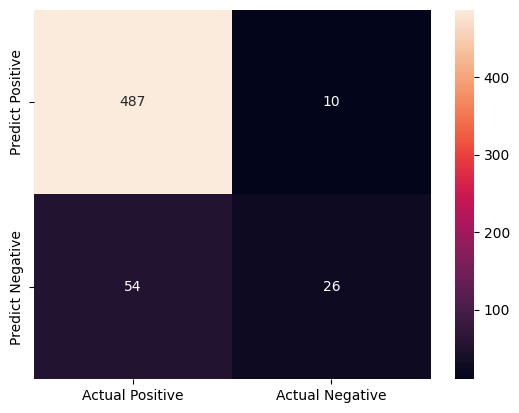

In [577]:
svm_cm = confusion_matrix(y_test, svm_pred_test)
print('Confusion matrix\n\n', svm_cm)
print('\nTrue Positives(TP) = ', svm_cm[0,0])
print('\nTrue Negatives(TN) = ', svm_cm[1,1])
print('\nFalse Positives(FP) = ', svm_cm[0,1])
print('\nFalse Negatives(FN) = ', svm_cm[1,0])
cm_matrix = pd.DataFrame(data=svm_cm, columns=['Actual Positive', 'Actual Negative'], 
                                 index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d')

## Summary of Results

In [578]:
from prettytable import PrettyTable
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC', 'Precision Training Score', 'Precision Test Score']

logistic_reg = [lg_acc, lg_prec, lg_rec, lg_f1, lg_auc, lg_prec_train, lg_prec_test]
logistic_reg = [f'{value:.4f}' if isinstance(value, float) else value for value in logistic_reg]

naive_bayes = [nb_acc, nb_prec, nb_rec, nb_f1, nb_auc, nb_prec_train, nb_prec_test]
naive_bayes = [f'{value:.4f}' if isinstance(value, float) else value for value in naive_bayes]

decision_tree = [dt_acc, dt_prec, dt_rec, dt_f1, dt_auc, dt_prec_train, dt_prec_test]
decision_tree = [f'{value:.4f}' if isinstance(value, float) else value for value in decision_tree]

k_nearest = [knn_acc, knn_prec, knn_rec, knn_f1, knn_auc, knn_prec_train, knn_prec_test] 
k_nearest = [f'{value:.4f}' if isinstance(value, float) else value for value in k_nearest]

support_vector = [svm_acc, svm_prec, svm_rec, svm_f1, svm_auc, svm_prec_train, svm_prec_test]
support_vector = [f'{value:.4f}' if isinstance(value, float) else value for value in support_vector]

# Create a list of tuples containing variable names and their values
variables = [
    ('Logistic Regression', logistic_reg),
    ('Naive Bayes', naive_bayes),
    ('Decision Tree', decision_tree),
    ('k-Nearest Neighbors', k_nearest),
    ('Support Vector Machines', support_vector)
]
table = PrettyTable()
# Display variables in a tabular format
table.add_column('Algorithm', labels)
table.add_column('Logistic Regression', logistic_reg)
table.add_column('Naive Bayes', naive_bayes)
table.add_column('Decision Tree', decision_tree)
table.add_column('k-Nearest Neighbors', k_nearest)
table.add_column('Support Vector Machines', support_vector)
table.align = 'l'
print(table)

+--------------------------+---------------------+-------------+---------------+---------------------+-------------------------+
| Algorithm                | Logistic Regression | Naive Bayes | Decision Tree | k-Nearest Neighbors | Support Vector Machines |
+--------------------------+---------------------+-------------+---------------+---------------------+-------------------------+
| Accuracy                 | 0.8804              | 0.7522      | 0.8475        | 0.8666              | 0.8891                  |
| Precision                | 0.7200              | 0.2797      | 0.4412        | 0.5455              | 0.7222                  |
| Recall                   | 0.2250              | 0.5000      | 0.3750        | 0.2250              | 0.3250                  |
| F1                       | 0.3429              | 0.3587      | 0.4054        | 0.3186              | 0.4483                  |
| AUC                      | 0.6055              | 0.6464      | 0.6493        | 0.5974          